In [1]:
import pald
import evoc
from sklearn.datasets import make_blobs
from tqdm import tqdm
import timeit
import matplotlib.pyplot as plt

/work/home/rsdewol/.conda/envs/PALD/lib/python3.12/site-packages/evoc/float_nndescent.py:287: NumbaTypeSafetyWarning: unsafe cast from uint64 to int64. Precision may be lost.
  points = point_indices[i]


In [2]:
sizes = [1000, 2500, 10000, 25000, 100000]
min_times = []
evoc_min_times = []
for n in tqdm(sizes):
    data, labels = make_blobs(n_samples=n, n_features=1024, centers=100)
    times = timeit.repeat(lambda: pald.PAKNNLD().fit(data), number=1, repeat=5)
    min_times.append(min(times))
    evoc_times = timeit.repeat(lambda: evoc.EVoC().fit_predict(data), number=1, repeat=5)
    evoc_min_times.append(min(evoc_times))

  0%|          | 0/5 [00:00<?, ?it/s]/work/home/rsdewol/.conda/envs/PALD/lib/python3.12/site-packages/evoc/node_embedding.py:13: RuntimeWarning: overflow encountered in divide
  result[n_samples > 0] = float(n_epochs) / np.float32(n_samples[n_samples > 0])
/work/home/rsdewol/.conda/envs/PALD/lib/python3.12/site-packages/evoc/node_embedding.py:13: RuntimeWarning: overflow encountered in divide
  result[n_samples > 0] = float(n_epochs) / np.float32(n_samples[n_samples > 0])
/work/home/rsdewol/.conda/envs/PALD/lib/python3.12/site-packages/evoc/node_embedding.py:13: RuntimeWarning: overflow encountered in divide
  result[n_samples > 0] = float(n_epochs) / np.float32(n_samples[n_samples > 0])
/work/home/rsdewol/.conda/envs/PALD/lib/python3.12/site-packages/evoc/node_embedding.py:13: RuntimeWarning: overflow encountered in divide
  result[n_samples > 0] = float(n_epochs) / np.float32(n_samples[n_samples > 0])
100%|██████████| 5/5 [45:52<00:00, 550.44s/it]


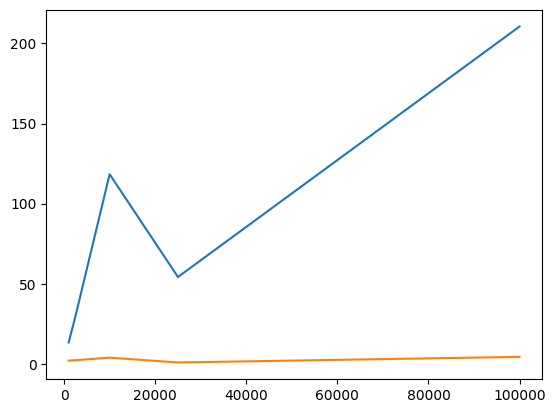

In [3]:
plt.plot(sizes, min_times, label="PAKNNLD")
plt.plot(sizes, evoc_min_times, label="EVoC")